In [2]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("Model/saved_model9.keras")

In [13]:
from DataLoader import get_data_loaders

train_data, val_data, test_data, data_loader = get_data_loaders(
        cases=["exp", "AS", "pi"],
        doping=9.0,
        max_shots=1200,
        train_split=0.8)

exp
mean stagg mag taken:  11.598333333333333
mean stagg mag:  11.598333333333333
1200  snapshots
AS
mean stagg mag taken:  11.986666666666666
mean stagg mag:  11.986666666666666
1200  snapshots
pi
mean stagg mag taken:  10.303333333333333
mean stagg mag:  10.303333333333333
1200  snapshots


In [14]:
import pandas as pd

x = loaded_model.predict(test_data)
df = pd.DataFrame(x, columns=["exp", "AS", "pi"])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


In [15]:
labels = []
classes = {0: "exp", 1: "AS", 2: "pi"}
for _, label in test_data:
    for l in label:
        labels.append(classes[list(l).index(1)])

2025-01-26 16:04:03.898853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
df["label"] = labels
print(df)

          exp        AS        pi label
0    0.126376  0.843794  0.029830    AS
1    0.014678  0.967967  0.017355    AS
2    0.940582  0.000346  0.059072    pi
3    0.629680  0.057678  0.312642    pi
4    0.000550  0.000121  0.999328   exp
..        ...       ...       ...   ...
355  0.999794  0.000181  0.000026   exp
356  0.916659  0.083338  0.000002   exp
357  0.998518  0.001469  0.000013   exp
358  0.995406  0.000314  0.004280   exp
359  0.281921  0.035409  0.682670    AS

[360 rows x 4 columns]


In [17]:
df["pred"] = df[["exp", "AS", "pi"]].idxmax(axis=1)

In [18]:
df

,exp,AS,pi,label,pred
0,0.126376,0.843794,0.029830,AS,AS
1,0.014678,0.967967,0.017355,AS,AS
2,0.940582,0.000346,0.059072,pi,exp
3,0.629680,0.057678,0.312642,pi,exp
4,0.000550,0.000121,0.999328,exp,pi
...,...,...,...,...,...
355,0.999794,0.000181,0.000026,exp,exp
356,0.916659,0.083338,0.000002,exp,exp
357,0.998518,0.001469,0.000013,exp,exp
358,0.995406,0.000314,0.004280,exp,exp


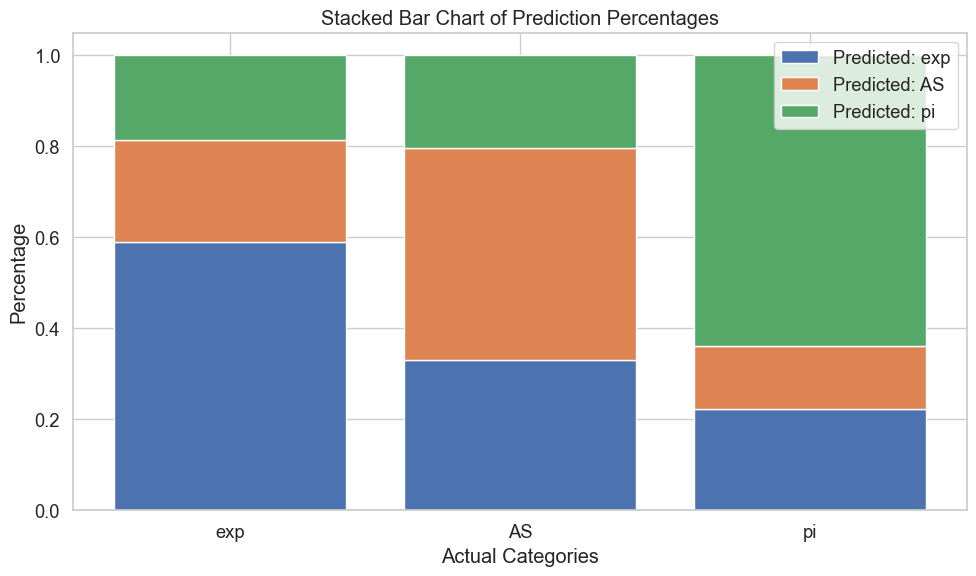

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories and calculate percentages
categories = ["exp", "AS", "pi"]
filtered = {c: df[df["label"] == c] for c in categories}
percentages = {
    c: {d: len(filtered[c][filtered[c]["pred"] == d]) / len(filtered[c]) for d in categories}
    for c in categories
}

# Convert percentages to a DataFrame for easier plotting
percentages_df = pd.DataFrame(percentages).T

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))  # X-axis positions

# Stacked bar chart
bottoms = np.zeros(len(categories))  # Initialize the bottom position for stacking
for pred in categories:
    ax.bar(
        x,
        percentages_df[pred],
        label=f'Predicted: {pred}',
        bottom=bottoms
    )
    bottoms += percentages_df[pred]  # Update the bottom for stacking

# Add labels, legend, and title
ax.set_xlabel('Actual Categories')
ax.set_ylabel('Percentage')
ax.set_title('Stacked Bar Chart of Prediction Percentages')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

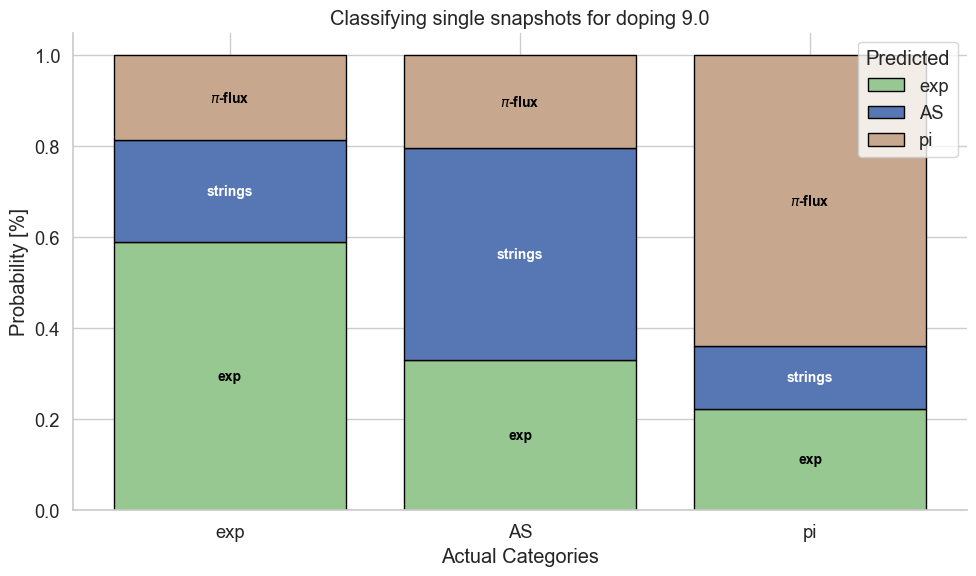

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define categories and calculate percentages
categories = ["exp", "AS", "pi"]
filtered = {c: df[df["label"] == c] for c in categories}
percentages = {
    c: {d: len(filtered[c][filtered[c]["pred"] == d]) / len(filtered[c]) for d in categories}
    for c in categories
}

# Convert percentages to a DataFrame for easier plotting
percentages_df = pd.DataFrame(percentages).T

# Define custom colors to match the example image
custom_colors = ['#98c892', '#5677b3', '#c8a78f']  # exp (green), AS (blue), pi (tan)

# Plot with Seaborn styling
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))  # X-axis positions

# Stacked bar chart
bottoms = np.zeros(len(categories))  # Initialize the bottom position for stacking
for i, (pred, color) in enumerate(zip(categories, custom_colors)):
    bars = ax.bar(
        x,
        percentages_df[pred],
        label=f'{pred}',
        color=color,
        bottom=bottoms,
        edgecolor='black'
    )
    # Add labels to the bars
    for bar, actual_label, percentage in zip(bars, categories, percentages_df[pred]):
        y_position = bar.get_height() / 2 + bar.get_y()
        if pred == "AS":
            label = "strings"
        elif pred == "pi":
            label = "$\\pi$-flux"
        else:
            label = pred
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center text in bar
            y_position,  # Place text in middle of bar
            label,  # Label text
            ha='center',  # Center horizontally
            va='center',  # Center vertically
            fontsize=10,  # Font size
            color='white' if pred == "AS" else 'black',  # Contrast color for visibility
            weight='bold'  # Bold font
        )
    bottoms += percentages_df[pred]  # Update the bottom for stacking

# Add labels, legend, and title
ax.set_xlabel('Actual Categories')
ax.set_ylabel('Probability [%]')
ax.set_title('Classifying single snapshots for doping 9.0')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title="Predicted", loc='upper right', frameon=True)
# Adjust aesthetics
sns.despine()
plt.tight_layout()
plt.show()